# Contraste de grupos

In [ ]:
# Instala dependencias
!pip install pingouin
!pip install pyreadstat
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase7_BaseContrasteDeGrupos.sav

## Visualización de datos

In [1]:
import pandas as pd

df = pd.read_spss("Clase7_BaseContrasteDeGrupos.sav")
df

,Código,Sexo,Pretest,Postest
0,001,Mujer,30.0,27.0
1,002,Hombre,24.0,23.0
2,003,Hombre,22.0,18.0
3,004,Mujer,30.0,18.0
4,005,Hombre,26.0,20.0
5,006,Mujer,24.0,25.0
6,007,Mujer,24.0,21.0
7,008,Mujer,22.0,17.0
8,009,Hombre,18.0,18.0
9,010,Mujer,28.0,26.0


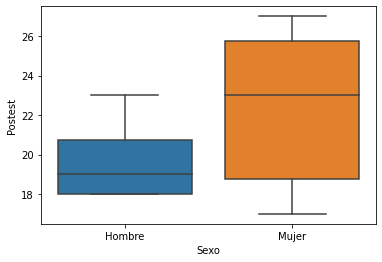

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Sexo", y="Postest", data=df)
plt.show()

## Descripción de los datos

In [4]:
df.groupby("Sexo").describe()

Pretest                                                    Postest  \
         count       mean       std   min   25%   50%   75%   max   count   
Sexo                                                                        
Hombre     4.0  22.500000  3.415650  18.0  21.0  23.0  24.5  26.0     4.0   
Mujer      6.0  26.333333  3.444803  22.0  24.0  26.0  29.5  30.0     6.0   

                                                             
             mean       std   min    25%   50%    75%   max  
Sexo                                                         
Hombre  19.750000  2.362908  18.0  18.00  19.0  20.75  23.0  
Mujer   22.333333  4.273952  17.0  18.75  23.0  25.75  27.0

## Análisis de normalidad

In [16]:
import pingouin as pg

pg.normality(dv="Postest", group="Sexo", method="shapiro", data=df)

,W,pval,normal
Mujer,0.892472,0.331341,True
Hombre,0.848079,0.219999,True


In [11]:
print("Postest")
print("Asimetría:", df["Postest"].skew())
print("Curtosis:", df["Postest"].kurtosis())

Postest
Asimetría: 0.42054972680350067
Curtosis: -1.5385767743013892


In [12]:
print("Pretest")
print("Asimetría:", df["Pretest"].skew())
print("Curtosis:", df["Pretest"].kurtosis())

Pretest
Asimetría: -0.11224133670350786
Curtosis: -0.3064373897707231


Ambas distribuciones se aproximan a la distribución normal. Por tanto, corresponde usar índice paramétrico t para dos muestras independientes.

## Contraste de muestras independientes

In [58]:
pg.homoscedasticity(data=df_ind, dv="Postest", group="Sexo")

,W,pval,equal_var
levene,3.512033,0.097797,True


El resultado de la prueba de Levene no es significativo, F=4.65, p=.06, por lo que se asumen varianzas iguales entre el grupo de mujeres y el de hombres.

In [13]:
hombre = df.query('Sexo == "Hombre"')["Postest"]
mujer = df.query('Sexo == "Mujer"')["Postest"]

pg.ttest(hombre, mujer, correction="False")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.088809,8,two-sided,0.307947,"[-8.05, 2.89]",0.702823,0.705,0.160991


No se observa una diferencia en ansiedad según el sexo de las y los participantes, t(8)=1.09, p=.31. Los puntajes de ansiedad reportados no difieren entre mujeres (M=22.33, DE=4.27) y hombres (M=19.75, DE=2.36).